In [133]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [125]:
# d is the number of features of an n x d dimensional dataset
# such that d_VC = d+1
def get_data(d):
    X, y = make_classification(
        n_samples = 5000,
        n_features = d,
        n_classes = 2,
        random_state = 1,
        shuffle=False,
        class_sep = 1,
        flip_y=0.01)
    
    
    return train_test_split(X, y, test_size = 0.667, random_state=1)

In [3]:
# split_ratio was set to 0.667 to make sure that models get enough
# to train, but it can vary according to a size of a dataset, so this
# can affect our results

In [126]:
get_data(4)

[array([[ 1.02189437,  0.02173525, -0.35834692,  0.58746392],
        [ 1.21311918,  1.82388597,  1.31090741,  0.31865166],
        [ 0.53271789,  1.58379018,  1.33163048, -0.02497085],
        ...,
        [-0.16618225, -1.99486215, -1.86464123,  0.32391304],
        [-0.08002065, -0.40373222, -0.36015784,  0.03868041],
        [-0.53526658, -1.67109944, -1.41499417,  0.04188482]]),
 array([[ 1.18546043, -0.49233639, -0.91547487,  0.7905097 ],
        [ 0.57949689,  0.59236247,  0.35689815,  0.21096236],
        [-0.14329371,  0.14231597,  0.19061854, -0.11299531],
        ...,
        [-0.32065993,  2.29542609,  2.33559917, -0.66927862],
        [ 0.47134958,  0.1935553 ,  0.011937  ,  0.23230999],
        [ 1.41480648,  0.73332976,  0.18294888,  0.6652123 ]]),
 array([1, 1, 1, ..., 0, 1, 0]),
 array([0, 1, 1, ..., 1, 1, 1])]

In [157]:
get_data(4)[0].min(), get_data(4)[0].max()

(-4.682908332875056, 4.634519700188178)

In [131]:
# normalization is set to 1 to make sure that average error is taken,
# not the sum of errors per each input, because we will play-around with
# the sample size

In [1]:
# here, the dataset was generated randomly, and hence is equivalent to
# a standardized one. Therefore, scaling was not used 

In [4]:
# accuracy is calculated by: (TP+TN)/# of all predictions
# in a confusion matrix

In [129]:
accuracy, logloss_hist = [], []

for i in range(4, 200, 2):
    X_train, X_test, y_train, y_test = get_data(i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy.append(
                    (cm(y_test, y_pred)[0][0] + cm(y_test, y_pred)[1][1])/cm(y_test, y_pred).sum()
                    )
    logloss_hist.append(log_loss(y_test, y_pred, normalize = 1))

In [148]:
# set of VC-dimensions at each iteration that will be used to plot a graph
set_of_d = []
for i in range(4, 200, 2):
    set_of_d.append(i+1)

In [130]:
logloss_hist

[4.795095584717251,
 4.774383634372393,
 4.753670724990139,
 4.75367000571209,
 4.795096064235951,
 4.639746366756843,
 4.919376637401024,
 4.867591007314495,
 4.8468780979322394,
 4.857235271901415,
 4.877950339117815,
 4.971158910856662,
 4.971158671097314,
 4.629390631343764,
 4.877950339117815,
 4.9297333318515015,
 5.0643689211516065,
 5.250786544148,
 5.05401198694178,
 4.95044504243701,
 5.012586647695968,
 5.033298358281477,
 4.898661570184624,
 4.898660611147227,
 5.064368441632907,
 4.919377596438421,
 5.126507169779673,
 5.188645897926439,
 5.095436606909543,
 5.03329691972538,
 5.1368636244708,
 4.960799818812691,
 5.188647576241885,
 5.437203687625694,
 5.147222476755422,
 5.04365217561976,
 5.209363122976983,
 5.312925032535416,
 5.281856867258781,
 5.126506690260974,
 5.281855428702684,
 5.043655772010001,
 5.60290983979593,
 5.551130443452484,
 5.561488576459057,
 5.416488380649946,
 5.364710662621945,
 5.540770632130465,
 5.613265575209009,
 5.4164922167995355,
 5.3129

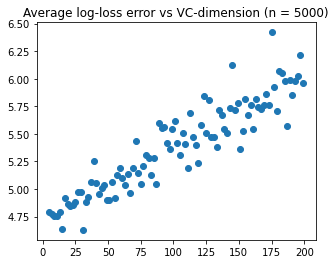

In [152]:
plt.rcParams["figure.figsize"] = (5,4)
plt.title('Average log-loss error vs VC-dimension (n = 5000)')
plt.scatter(x = set_of_d, y = logloss_hist)

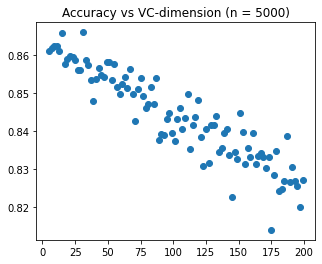

In [154]:
plt.rcParams["figure.figsize"] = (5,4)
plt.title('Accuracy vs VC-dimension (n = 5000)')
plt.scatter(x = set_of_d, y = accuracy)

## The same procedure, but with 15000 sample-sized datasets

In [140]:
# d is the number of features of an n x d dimensional dataset
# such that d_VC = d+1
def get_data2(d):
    X, y = make_classification(
        n_samples = 15000,
        n_features = d,
        n_classes = 2,
        random_state = 1,
        shuffle=False,
        class_sep = 1,
        flip_y=0.01)
    
    
    return train_test_split(X, y, test_size = 0.667, random_state=1)

In [141]:
accuracy2, logloss_hist2 = [], []

for i in range(4, 200, 2):
    X_train, X_test, y_train, y_test = get_data2(i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy2.append(
                    (cm(y_test, y_pred)[0][0] + cm(y_test, y_pred)[1][1])/cm(y_test, y_pred).sum()
                    )
    logloss_hist2.append(log_loss(y_test, y_pred, normalize = 1))

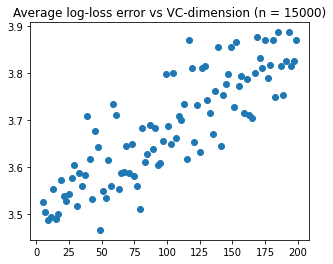

In [155]:
plt.rcParams["figure.figsize"] = (5,4)
plt.title('Average log-loss error vs VC-dimension (n = 15000)')
plt.scatter(x = set_of_d, y = logloss_hist2)

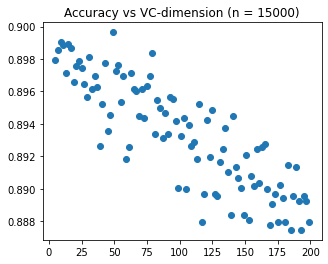

In [156]:
plt.rcParams["figure.figsize"] = (5,4)
plt.title('Accuracy vs VC-dimension (n = 15000)')
plt.scatter(x = set_of_d, y = accuracy2)